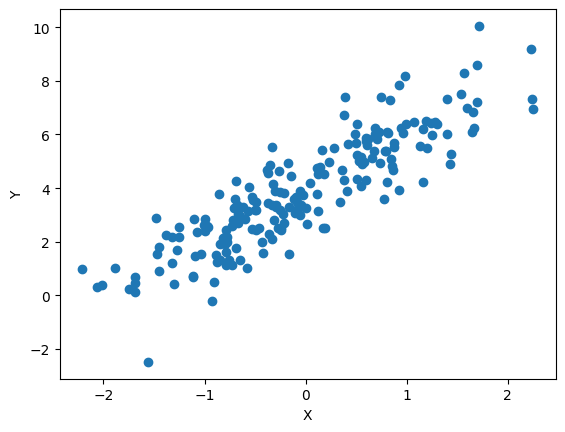

initial weight : [-1.67944006  2.6204462  -0.88394784 -0.45796951  0.66957373 -3.36025064
  0.72105958 -0.20762439 -0.03939998  1.14574433  1.29357337 -0.17178131
  0.92170178  0.74016061 -1.09803868  1.19157535  0.72258527  0.51913157
 -0.57403359 -0.99044894 -0.73142303  0.51990333 -0.96623804 -1.06510429
  0.03629425  2.00025052  0.6549163  -2.12046322  0.2755714  -0.14993868
  1.04432561 -1.9373769   0.87664784 -0.4958701  -1.97101418 -0.55833159
 -1.09107764  1.05158553  0.84968536 -0.69135662 -1.55817357 -1.22742522
 -0.45510142  0.79664794 -0.02400951  0.04100808  0.45859791 -1.15896847
 -1.6079389  -0.98981726  0.1315376  -0.78173464  0.12831142  0.69954542
  0.33931388  0.02545182  0.43611247 -1.54647261  0.23997173 -1.86482526
 -0.32034379 -1.37395502 -0.51634464  1.06166178  1.63736767  1.29899285
 -0.48585153  0.40921004 -0.87149865 -0.56928133  0.50413881  0.55608775
  0.29885998  0.79653196 -0.17320796 -1.40613445  1.18207571  0.43546666
 -0.66153242 -0.98111093 -0.363571

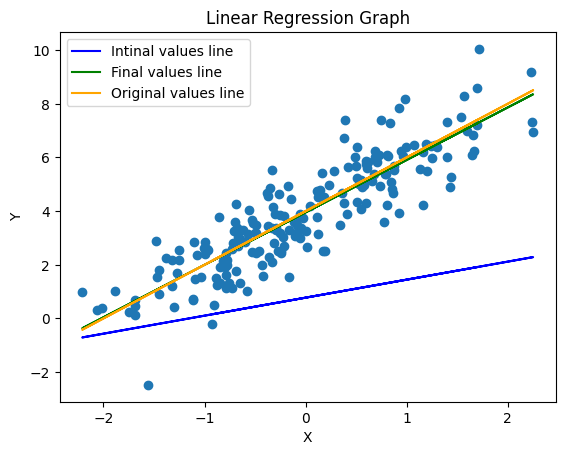

In [1]:
from numpy.random import normal
import matplotlib.pyplot as plt
import random

a = 4  # height
b = 2  # slope

# generate data
N = 200  # sample size
X = normal(loc=0.0, scale=1.0, size=N)
W = normal(loc=0.0, scale=1.0, size=N)
Y = a + b * X + W

# plot data
plt.scatter(X, Y)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
print("initial weight :", W)


# A function that calculates the mean squared error for
# given values of X and Y with parameters w1 and w2

def mean_square_error(X, Y, w1, w2):
    n = len(X)
    total_error = 0

    # running the loop for total numer of samples in dataset
    for i in range(n):
        # calculating the error value as given in the
        # above formula in statement (a)
        total_error = total_error + (w1 + w2 * X[i] - Y[i]) ** 2

    # Since this is a mean error, dividing the total error
    # calculated by total number of samples
    mse = total_error / n
    return mse
    # A function that calculates the Gradient/partial derivative of MSE


# We use partial derivatives to find how each individual parameter (w1 and w2)
# affects MSE and to update the values of w1 and w2
def gradient_mean_square_error(X, Y, w1, w2):
    n = len(X)
    partial_derivative_w1 = 0
    partial_derivative_w2 = 0

    # calculate the mse partial derivatives of w1 and w2
    # for number of samples in the dataset as we calculated them above
    for i in range(n):
        partial_derivative_w1 += 2 * (w1 + w2 * X[i] - Y[i])
        partial_derivative_w2 += 2 * (w1 + w2 * X[i] - Y[i]) * X[i]

    # take the mean of w1 and w2 vals
    partial_derivative_w1 = partial_derivative_w1 / n
    partial_derivative_w2 = partial_derivative_w2 / n

    return partial_derivative_w1, partial_derivative_w2
    # This function implements the gradient descent algorithm


def gradient_descent(X, Y, w1, w2, learning_rate, num_iterations):
    mse_list = []

    for i in range(num_iterations):
        # We use our gradient_mean_square_error to
        # calculate partial derivatives of w1 and w2 and update them
        partial_derivative_w1, partial_derivative_w2 = gradient_mean_square_error(X, Y, w1, w2)
        w1 -= learning_rate * partial_derivative_w1
        w2 -= learning_rate * partial_derivative_w2

        mse_list.append(mean_square_error(X, Y, w1, w2))
    # return the final calculated derivatives
    return w1, w2, mse_list
    # Generate random value for w1 and w2 between 0 and 1


initial_w1 = random.uniform(0, 1)
initial_w2 = random.uniform(0, 1)

# define the learning rate and no of iterations we need to calculate
learning_rate = 0.1
iterations = 1000

# Perform gradient descent using our implemented gradient descent function
final_w1, final_w2, mse_final_list = gradient_descent(X, Y, initial_w1, initial_w2, learning_rate, iterations)

# Print the original and new calculated values of a and b
print("Original value a = ", a, " New calculated value w1 = ", final_w1)
print("Original value b = ", b, " New calculated value w1 = ", final_w2)


def predict(Y, X, w1, w2):
    Y_pred = []
    for x in X:
        val = w2 * x + w1
        Y_pred.append(val)
    return Y_pred
    plt.figure(figsize=(10, 10))


# plot data as given above
plt.scatter(X, Y)
plt.xlabel('X')
plt.ylabel('Y')

get_preds = predict(Y, X, initial_w1, initial_w2)
plt.plot(X, get_preds, color='b', label="Intinal values line")

get_preds = predict(Y, X, final_w1, final_w2)
plt.plot(X, get_preds, color='g', label="Final values line")

get_preds = predict(Y, X, a, b)
plt.plot(X, get_preds, color='orange', label="Original values line")

# Plot the grpah
plt.title("Linear Regression Graph")
plt.legend()
plt.show()